## Análise de Cluster
### MBA em Data Science e Analytics USP ESALQ

**Prof Dr.** Wilson Tarantin Junior

**Aluna:** Luiza Batista Laquini

**Turma:** DSA 2024-1

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import pingouin as pg
import plotly.express as px 
import plotly.graph_objects as go

#import plotly.io as pio
#pio.renderers.default='browser'

import warnings
warnings.filterwarnings("ignore")

In [25]:
# Leitura dos dados
dados_paises = pd.read_csv('dados_paises.csv')
## Fonte: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

# Estrutura dos dados
dados_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [26]:
# Visualização de amostra da tabela
dados_paises.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [27]:
# Estatísticas descritivas das variáveis quantitativas
tab_desc = dados_paises.describe()
tab_desc

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Temos escalas diferentes -> necessário normalizar.

Por mais que a normalização idealmente nao afete as relações entre as variáveis, é interessante verificar a correlação dos dados antes de normalizá-los!

In [28]:
# Ficando apenas com variáveis numéricas
paises = dados_paises.drop(columns=['country'])

# Correlações de Pearson 
# matriz_corr = pg.rcorr(paises, method = 'pearson', upper = 'pval', 
#                        decimals = 4, 
#                        pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

# Correlação Linear
corr = paises.corr()

# Mapa de calor das correlações lineares
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.2f}',
        colorscale='viridis'))
fig.update_layout(
    height = 600,
    width = 600)
fig.show()

In [29]:
# Normalização por Z-Score (média = 0 e desvio padrão = 1)
paises_pad = paises.apply(zscore, ddof=1)

### Clusterização Hierárquica Aglomerativa

Medida de similaridade: Distância Euclidiana<br>
Método de encadeamento: Testes com todos (*Single Linkage*, *Complete Linkage* e *Average Linkage*)

In [30]:
# Calculando as distâncias
dist_euclidiana = pdist(paises_pad, metric='euclidean')

#### *single-linkage*

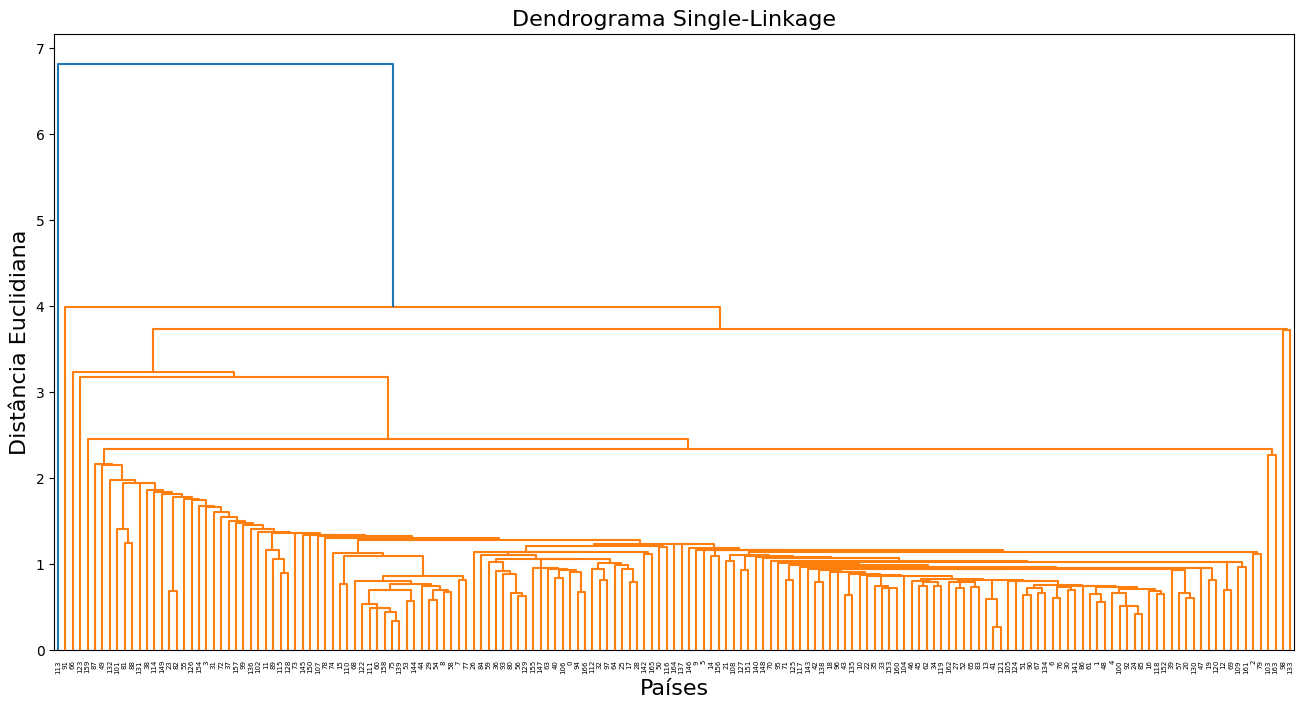

In [31]:
# Dendrograma
plt.figure(figsize=(16,8))
dend_sing = sch.linkage(paises_pad, method = 'single', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing)
plt.title('Dendrograma Single-Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

In [32]:
# OBS!!

# Metric options:
  ## euclidean
  ## sqeuclidean
  ## cityblock
  ## chebyshev
  ## canberra
  ## correlation

# Method options:
  ## single
  ## complete
  ## average

#### *average-linkage*

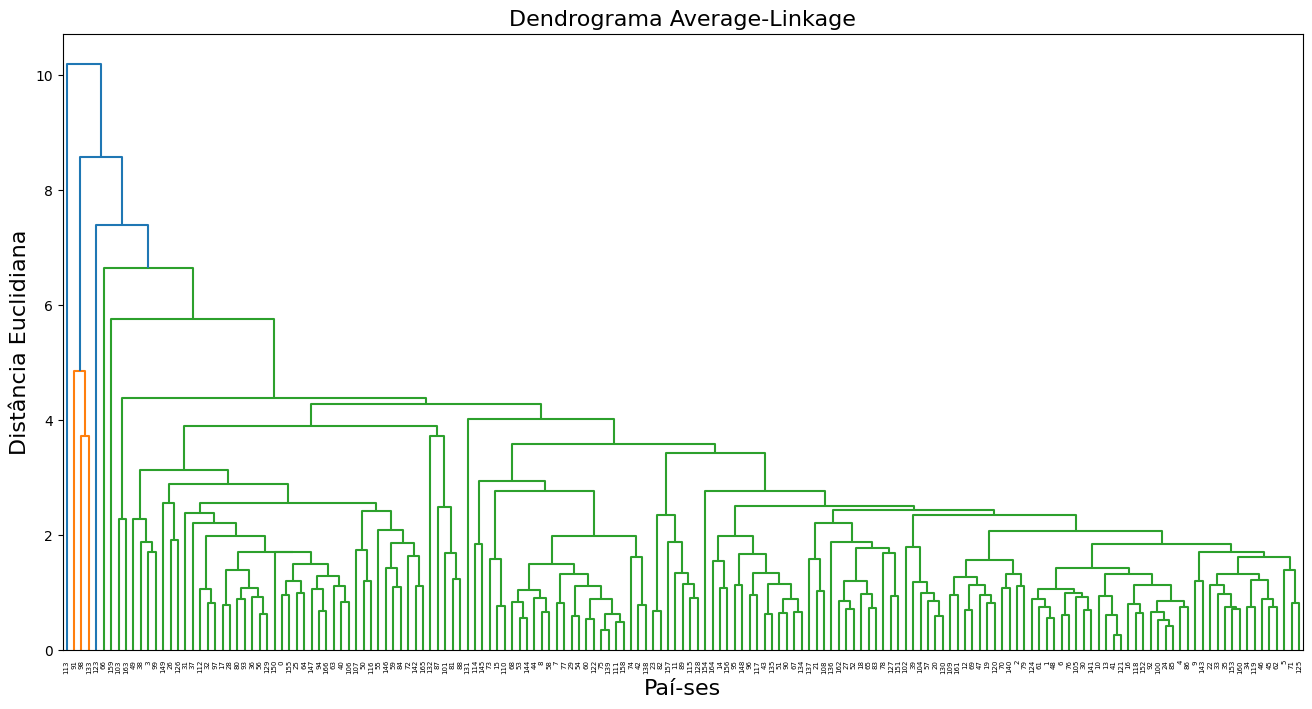

In [33]:
# Dendrograma
plt.figure(figsize=(16,8))
dend_avg = sch.linkage(paises_pad, method = 'average', metric = 'euclidean')
dendrogram_a = sch.dendrogram(dend_avg)
plt.title('Dendrograma Average-Linkage', fontsize=16)
plt.xlabel('Paí­ses', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

#### *complete-linkage*

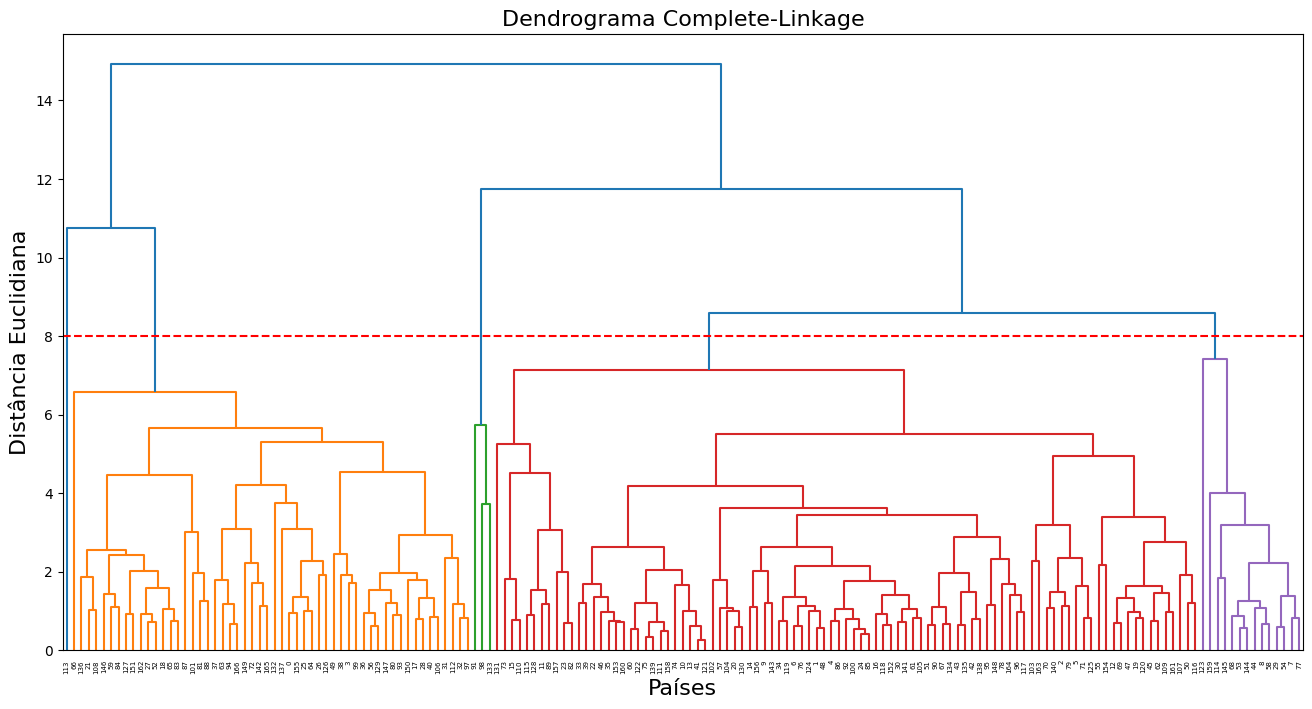

In [34]:
# Dendrograma
plt.figure(figsize=(16,8))
dend_compl = sch.linkage(paises_pad, method = 'complete', metric = 'euclidean')
dendrogram_c = sch.dendrogram(dend_compl, color_threshold = 8)
plt.title('Dendrograma Complete-Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 8, color = 'red', linestyle = '--')
plt.show()

O método complete-linkage aparenta melhor divisão dos grupos

In [35]:
# Coluna para identificação do cluster
cluster_comp = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(paises_pad)
dados_paises['cluster_complete'] = indica_cluster_comp
paises_pad['cluster_complete'] = indica_cluster_comp
dados_paises['cluster_complete'] = dados_paises['cluster_complete'].astype('category')
paises_pad['cluster_complete'] = paises_pad['cluster_complete'].astype('category')

### ANOVA

Interpretação do output:

 cluster_kmeans MS: indica a variabilidade entre grupos (inter)<br>
 Within MS: indica a variabilidade dentro dos grupos (intra)<br>
 F: estatí­stica de teste (cluster_kmeans MS / Within MS)<br>
 p-unc: p-valor da estatí­stica F<br>
 se p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais 
 (rejeição da hipótese nula -> a clusterização é adequada)

**child_mort**

In [36]:
pg.anova(dv='child_mort', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,100.71482,65.28518
DF,4,162
MS,25.178705,0.402995
F,62.478961,NaN
p-unc,0.0,NaN
np2,0.606716,NaN


**exports**

In [37]:
pg.anova(dv='exports', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,79.966834,86.033166
DF,4,162
MS,19.991709,0.531069
F,37.644283,NaN
p-unc,0.0,NaN
np2,0.481728,NaN


**imports**

In [38]:
pg.anova(dv='imports', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,69.028651,96.971349
DF,4,162
MS,17.257163,0.598589
F,28.829756,NaN
p-unc,0.0,NaN
np2,0.415835,NaN


**health**

In [39]:
pg.anova(dv='health', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,25.065957,140.934043
DF,4,162
MS,6.266489,0.869963
F,7.203166,NaN
p-unc,0.000023,NaN
np2,0.151,NaN


**income**

In [40]:
pg.anova(dv='income', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,84.56379,81.43621
DF,4,162
MS,21.140947,0.502693
F,42.055414,NaN
p-unc,0.0,NaN
np2,0.50942,NaN


**inflation**

In [41]:
pg.anova(dv='inflation', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,88.665145,77.334855
DF,4,162
MS,22.166286,0.477376
F,46.433635,NaN
p-unc,0.0,NaN
np2,0.534127,NaN


**life_expec**

In [42]:
pg.anova(dv='life_expec', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,111.450643,54.549357
DF,4,162
MS,27.862661,0.336724
F,82.746182,NaN
p-unc,0.0,NaN
np2,0.671389,NaN


**total_fer**

In [43]:
pg.anova(dv='total_fer', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,113.930595,52.069405
DF,4,162
MS,28.482649,0.321416
F,88.616129,NaN
p-unc,0.0,NaN
np2,0.686329,NaN


**gdpp**

In [44]:
pg.anova(dv='gdpp', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,107.339064,58.660936
DF,4,162
MS,26.834766,0.362105
F,74.107785,NaN
p-unc,0.0,NaN
np2,0.646621,NaN


 A variável mais discriminante contém a maior estatística F (e significativa)<br>
 O valor da estatítica F é sensí­vel ao tamanho da amostra

### Gráficos 3D

Perspectiva 1

In [45]:
fig = px.scatter_3d(dados_paises, 
                    x='total_fer', 
                    y='income', 
                    z='life_expec',
                    color='cluster_complete')
fig.show()

Perspectiva 2

In [46]:
fig = px.scatter_3d(dados_paises, 
                    x='gdpp', 
                    y='income', 
                    z='life_expec',
                    color='cluster_complete')
fig.show()

### Características dos clusters

Agrupando o banco de dados

In [47]:
# Agrupando os dados por cluster
analise_paises = dados_paises.drop(columns=['country']).groupby(by=['cluster_complete'])

# Médias por grupo
tab_medias_grupo = analise_paises.mean().T
tab_medias_grupo

cluster_complete,0,1,2,3,4
child_mort,4.500000,18.874737,4.133333,130.00,81.344444
exports,39.392857,42.718726,176.000000,25.30,31.520741
health,10.292143,6.410842,6.793333,5.07,6.660185
imports,33.207143,44.488062,156.666667,17.40,49.111111
income,49721.428571,18582.000000,64033.333333,5150.00,3787.462963
inflation,2.093571,7.124495,2.468000,104.00,8.926389
life_expec,80.892857,74.478947,81.433333,60.50,60.555556
total_fer,1.800000,2.142000,1.380000,5.84,4.697037
gdpp,53742.857143,11941.473684,57566.666667,2330.00,1910.074074


EstatÃ­sticas descritivas por grupo

In [48]:
# Estatísticas Descritivas por grupo 
tab_desc_grupo = analise_paises.describe().T
tab_desc_grupo

cluster_complete             0             1              2       3  \
child_mort count     14.000000     95.000000       3.000000     1.0   
           mean       4.500000     18.874737       4.133333   130.0   
           std        1.781529     16.376170       2.309401     NaN   
           min        2.600000      3.200000       2.800000   130.0   
           25%        3.200000      7.700000       2.800000   130.0   
...                        ...           ...            ...     ...   
gdpp       min    40600.000000    482.000000   21100.000000  2330.0   
           25%    44925.000000   3885.000000   33850.000000  2330.0   
           50%    47900.000000   8000.000000   46600.000000  2330.0   
           75%    56525.000000  14050.000000   75800.000000  2330.0   
           max    87800.000000  50300.000000  105000.000000  2330.0   

cluster_complete             4  
child_mort count     54.000000  
           mean      81.344444  
           std       39.074325  
           min       17.400000  
           25%       54.275000  
...                        ...  
gdpp       min      231.000000  
           25%      566.000000  
           50%      983.500000  
           75%     2600.000000  
           max    17100.000000  

[72 rows x 5 columns]